In [67]:
import pandas as pd
import numpy as np
import re
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import datetime
import sys
sys.path.insert(0, '/Users/xuetong/Documents/YouTube_APIs')
from credentials import *

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None 

In [209]:
import plotly
sys.path.insert(0, '/Users/xuetong/Documents/YouTube_APIs/plotly_credential.py')
from plotly_credential import *
plotly.tools.set_credentials_file(username=plotly_username, api_key=plotly_key)
import plotly.plotly as py
import plotly.graph_objs as go

In [28]:
engine = create_engine('postgresql://user1@localhost:5432/mydb')
df = pd.read_sql_query('SELECT * FROM "video_nineteen"',con=engine)

In [29]:
df.drop_duplicates(['video_id'],inplace=True)

## Data Overview

In [30]:
df['datetime']=pd.to_datetime(df['publishedAt'])
df['date']=df['datetime'].apply(lambda x: x.date())

In [31]:
df.head()

,category_id,channel_id,channel_title,comment_count,datetime,description,dislike_count,duration,like_count,publishedAt,tags,title,urls,video_id,view_count,date
0,22.0,UC1ea-CDBneRgQmcTKhdpKPQ,Kelly Yager,63.0,2019-01-16 13:00:00,"Instagram, Snapchat, Twitter: @klynneyagerCUPS...",19.0,PT14M12S,429.0,2019-01-16T13:00:00.000Z,"['cupshe try on', 'cupshe bikini haul', 'sprin...",AFFORDABLE BIKINI HAUL! | CUPSHE SPRING BREAK ...,None,-0Lq9Q_6_x0,26909.0,2019-01-16
1,22.0,UCGoQuvbcDVhPpLAYs4n8wcw,LoveMeg,76.0,2019-01-12 10:30:00,PRIMARK HAUL JANUARY 2019 | NEW INHope you enj...,9.0,PT9M48S,61.0,2019-01-12T10:30:00.000Z,"['primark', 'haul', 'new in primark', 'primark...",PRIMARK HAUL JANUARY 2019 | NEW IN,None,-0yDfvzcl8c,3021.0,2019-01-12
2,26.0,UCNfjXMvwZPgBJfCAHYs0aiw,Brunette Freckle,17.0,2019-01-26 00:08:00,Hey Hey! This is the last week to shop that am...,20.0,PT10M28S,139.0,2019-01-26T00:08:00.000Z,"['12-9-18', 'zara', 'zara haul', 'zara sale', ...",HUGE ZARA CLOTHING HAUL & TRY-ON!,None,-56Xcr7R5xU,10277.0,2019-01-26
3,22.0,UCExRaiTo91wHZVQQ3rNr7GA,Stephy Jaynne,0.0,2019-03-04 20:00:28,3/3/2019: Today my cousin and i went to the Sa...,0.0,PT13M26S,2.0,2019-03-04T20:00:28.000Z,['Stephy Jaynne'],READY TO BE A BRIDE!!!//SBF,None,32Wub0rlUM8,20.0,2019-03-04
4,26.0,UCyKlcayeNPgJ_05ItVRLy2g,Sierra Schultzzie,2573.0,2019-01-09 18:00:00,Styling clothes I hate on my mid size body! I'...,1193.0,PT22M2S,26609.0,2019-01-09T18:00:00.000Z,"['megan batoon', 'i style outfits i hate', 'st...",I Styled Clothes I Hate for a Week,None,-9qYv2PfnsU,1083518.0,2019-01-09


## Time Related Feature Exploration

In [210]:
date_counts=df.groupby(['date'])['video_id'].count()

data = [go.Scatter(x=date_counts.index, y=date_counts.values)]
py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~xuetongz/0 or inside your plot.ly account where it is named 'time-series-simple'


/Users/xuetong/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



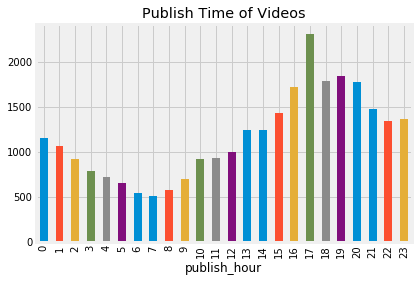

In [33]:
df["publish_hour"]=df['datetime'].apply(lambda x:x.hour)
list1=df.groupby("publish_hour")['video_id'].count().plot.bar()
list1.set_xticklabels(list1.get_xticklabels(),rotation=90)
plt.title("Publish Time of Videos")
sns.set_context(font_scale=1)

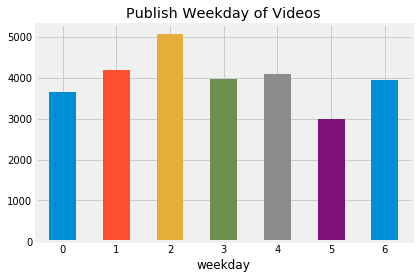

In [34]:
df['weekday']=df['datetime'].apply(lambda x: x.weekday())
list2=df.groupby("weekday")['video_id'].count().plot.bar()
list2.set_xticklabels(list2.get_xticklabels(),rotation=0)
plt.title("Publish Weekday of Videos")
sns.set_context(font_scale=1)

In [35]:
df_complete=df[pd.notna(df['view_count'])]

In [36]:
df_complete.shape

(5775, 18)

In [37]:
df_complete.head()

,category_id,channel_id,channel_title,comment_count,datetime,description,dislike_count,duration,like_count,publishedAt,tags,title,urls,video_id,view_count,date,publish_hour,weekday
0,22.0,UC1ea-CDBneRgQmcTKhdpKPQ,Kelly Yager,63.0,2019-01-16 13:00:00,"Instagram, Snapchat, Twitter: @klynneyagerCUPS...",19.0,PT14M12S,429.0,2019-01-16T13:00:00.000Z,"['cupshe try on', 'cupshe bikini haul', 'sprin...",AFFORDABLE BIKINI HAUL! | CUPSHE SPRING BREAK ...,None,-0Lq9Q_6_x0,26909.0,2019-01-16,13,2
1,22.0,UCGoQuvbcDVhPpLAYs4n8wcw,LoveMeg,76.0,2019-01-12 10:30:00,PRIMARK HAUL JANUARY 2019 | NEW INHope you enj...,9.0,PT9M48S,61.0,2019-01-12T10:30:00.000Z,"['primark', 'haul', 'new in primark', 'primark...",PRIMARK HAUL JANUARY 2019 | NEW IN,None,-0yDfvzcl8c,3021.0,2019-01-12,10,5
2,26.0,UCNfjXMvwZPgBJfCAHYs0aiw,Brunette Freckle,17.0,2019-01-26 00:08:00,Hey Hey! This is the last week to shop that am...,20.0,PT10M28S,139.0,2019-01-26T00:08:00.000Z,"['12-9-18', 'zara', 'zara haul', 'zara sale', ...",HUGE ZARA CLOTHING HAUL & TRY-ON!,None,-56Xcr7R5xU,10277.0,2019-01-26,0,5
3,22.0,UCExRaiTo91wHZVQQ3rNr7GA,Stephy Jaynne,0.0,2019-03-04 20:00:28,3/3/2019: Today my cousin and i went to the Sa...,0.0,PT13M26S,2.0,2019-03-04T20:00:28.000Z,['Stephy Jaynne'],READY TO BE A BRIDE!!!//SBF,None,32Wub0rlUM8,20.0,2019-03-04,20,0
4,26.0,UCyKlcayeNPgJ_05ItVRLy2g,Sierra Schultzzie,2573.0,2019-01-09 18:00:00,Styling clothes I hate on my mid size body! I'...,1193.0,PT22M2S,26609.0,2019-01-09T18:00:00.000Z,"['megan batoon', 'i style outfits i hate', 'st...",I Styled Clothes I Hate for a Week,None,-9qYv2PfnsU,1083518.0,2019-01-09,18,2


In [38]:
import isodate
df_complete['duration_t']=df_complete['duration'].apply(lambda x: isodate.parse_duration(x))
df_complete['duration_m']=df_complete['duration_t'].apply(lambda x: int(x.total_seconds()/60))

df_complete['duration_m'].describe()

count    5775.000000
mean        9.508052
std         7.893070
min         0.000000
25%         4.000000
50%         9.000000
75%        13.000000
max        79.000000
Name: duration_m, dtype: float64

[(0, 80)]

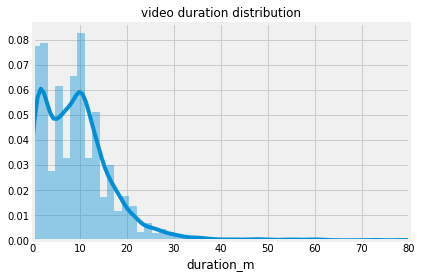

In [39]:
g1=sns.distplot(df_complete['duration_m'],kde=True)
g1.set_title('video duration distribution',fontsize=12)
g1.set(xlim=(0,80))

## Statistical Feature Exploration

In [54]:
#df_complete['like_disabled']=df_complete['like_count']==None
#df_complete['dislike_disabled']=df_complete['dislike_count']==None
df_complete['like_count'].fillna(0,inplace=True)
df_complete['dislike_count'].fillna(0,inplace=True)
#df_complete['comment_disabled']=df_complete['comment_count']==None
df_complete['comment_count'].fillna(0,inplace=True)
df_complete['log_view_count']=np.log1p(df_complete['view_count'])
df_complete['log_like_count']=np.log1p(df_complete['like_count'])
df_complete['log_dislike_count']=np.log1p(df_complete['dislike_count'])
df_complete['log_comment_count']=np.log1p(df_complete['comment_count'])

In [56]:
df_complete[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

,view_count,like_count,dislike_count,comment_count
count,5.775000e+03,5775.000000,5775.000000,5775.000000
mean,8.791729e+04,2125.954113,108.561385,217.273593
std,5.792744e+05,10645.224677,1002.189056,1285.584480
min,0.000000e+00,0.000000,0.000000,0.000000
25%,4.940000e+02,12.000000,0.000000,2.000000
50%,6.481000e+03,189.000000,8.000000,32.000000
75%,3.862550e+04,1165.500000,43.000000,130.000000
max,2.183208e+07,271790.000000,50974.000000,52377.000000


Text(0.5,1,'Comment Count Distributin')

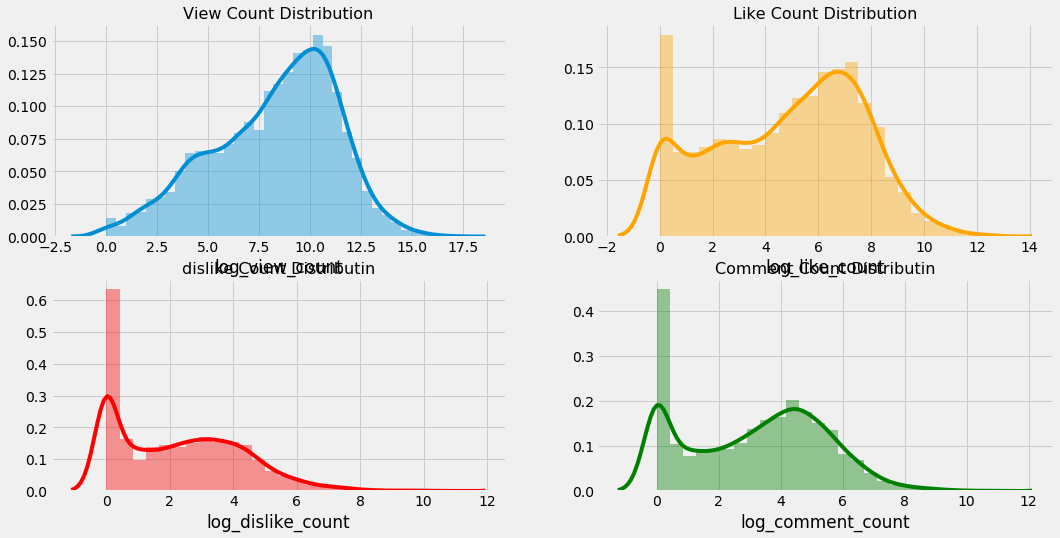

In [55]:
plt.figure(figsize=(16,8))

plt.subplot(221)
g1=sns.distplot(df_complete['log_view_count'],kde=True)
g1.set_title('View Count Distribution', fontsize=16)

plt.subplot(222)
g2=sns.distplot(df_complete['log_like_count'],color='orange',kde=True)
g2.set_title('Like Count Distribution', fontsize=16)

plt.subplot(223)
g3=sns.distplot(df_complete['log_dislike_count'],color='red',kde=True)
g3.set_title('dislike Count Distributin', fontsize=16)

plt.subplot(224)
g4=sns.distplot(df_complete['log_comment_count'],color='green',kde=True)
g4.set_title('Comment Count Distributin', fontsize=16)

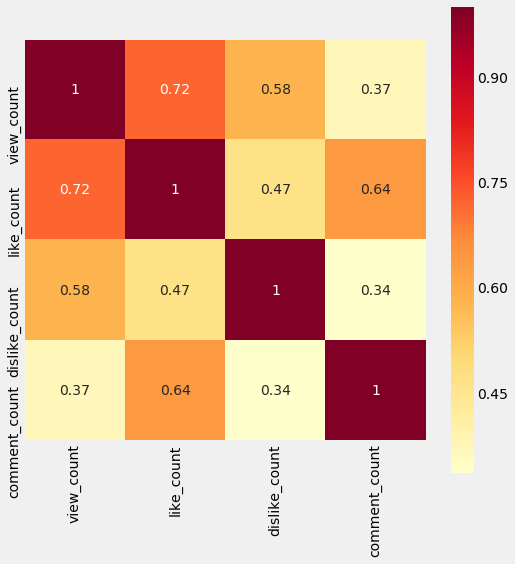

In [196]:
columns_show=['view_count', 'like_count', 'dislike_count', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df_complete[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="YlOrRd",
            square=True, ax=ax,annot=True)

## Text Analysis

In [122]:
df['text']=df['title']+" "+df['description']
df['text'].head()

0    AFFORDABLE BIKINI HAUL! | CUPSHE SPRING BREAK ...
1    PRIMARK HAUL JANUARY 2019 | NEW IN PRIMARK HAU...
2    HUGE ZARA CLOTHING HAUL & TRY-ON! Hey Hey! Thi...
3    READY TO BE A BRIDE!!!//SBF 3/3/2019: Today my...
4    I Styled Clothes I Hate for a Week Styling clo...
Name: text, dtype: object

In [124]:
df[df['channel_id']=='UC-0A4lQpLNxX5RNQgFztLNQ']

,category_id,channel_id,channel_title,comment_count,datetime,description,dislike_count,duration,like_count,publishedAt,tags,title,urls,video_id,view_count,date,publish_hour,weekday,text
4896,26.0,UC-0A4lQpLNxX5RNQgFztLNQ,PAZZION,0.0,2019-03-06 00:00:03,Behind The Scenes: PAZZION Spring / Summer 201...,0.0,PT1M19S,0.0,2019-03-06T00:00:03.000Z,"{pazzion,shoes,heels,loafers,""casual sneakers""}",PAZZION Spring / Summer 2019 Campaign Behind T...,None,ntYnGMbDxQk,46.0,2019-03-06,0,2,PAZZION Spring / Summer 2019 Campaign Behind T...
4898,26.0,UC-0A4lQpLNxX5RNQgFztLNQ,PAZZION,0.0,2019-03-06 00:00:03,An air of summer freedom envelops the downtown...,0.0,PT1M30S,0.0,2019-03-06T00:00:03.000Z,"{pazzion,ss19,shoes}",PAZZION Spring/Summer 2019 Campaign,None,eC439Zif4rE,91.0,2019-03-06,0,2,PAZZION Spring/Summer 2019 Campaign An air of ...


In [163]:
fast_fashion_brands=['ASOS','Bershka','Boohoo','Charlotte Russe','CharlotteRusse','Fashion Nova','FashionNova','Forever 21','Forever21','Gap','Giordano',
                     'H&M','hm','Mango','Massimo Dutti','MassimoDutti','Missguided','Nasty Gal','NastyGal',
                     'PrettyLittleThing','Primark','Riachuelo','Romwe',
                     'Shein','Stradivarius','Topshop','Uniqlo','Zaful','Zara']

In [164]:
text_grpby_channel=df.groupby('channel_id')['text'].apply(lambda x: ''.join(str(x))).reset_index()

In [165]:
text_grpby_channel.head()

,channel_id,text
0,UC--j-yuiKFQhNAUYLt3v4fA,6098 EXPOSING ARI PETROU! (UK&#39;s Biggest...
1,UC-0A4lQpLNxX5RNQgFztLNQ,4896 PAZZION Spring / Summer 2019 Campaign ...
2,UC-10DCqtn6_5KviFFUoaaOg,27974 STYLING EARLY 2000S TRENDS How to sty...
3,UC-1F7DZmxTd1YZUJZUsA0nw,1632 Üó___Ç__éÎ_æÜó 20190304 Ë»_ë__...
4,UC-1ZY8bY46rX3ySgG3Qyn3g,2862 MY MINIMALIST WARDROBE / The Clear ou...


In [166]:
text_grpby_channel.columns

Index(['channel_id', 'text'], dtype='object')

In [167]:
columns=['channel_id', 'text']
for brand in fast_fashion_brands:
    text_grpby_channel['temp']= text_grpby_channel['text'].str.count((brand).lower(),re.I)
    columns.append(brand)
    text_grpby_channel.columns=columns

,channel_id,text,ASOS,Bershka,Boohoo,Charlotte Russe,CharlotteRusse,Fashion Nova,FashionNova,Forever 21,...,PrettyLittleThing,Primark,Riachuelo,Romwe,Shein,Stradivarius,Topshop,Uniqlo,Zaful,Zara
0,UC--j-yuiKFQhNAUYLt3v4fA,6098 EXPOSING ARI PETROU! (UK&#39;s Biggest...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,UC-0A4lQpLNxX5RNQgFztLNQ,4896 PAZZION Spring / Summer 2019 Campaign ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UC-10DCqtn6_5KviFFUoaaOg,27974 STYLING EARLY 2000S TRENDS How to sty...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,UC-1F7DZmxTd1YZUJZUsA0nw,1632 Üó___Ç__éÎ_æÜó 20190304 Ë»_ë__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,UC-1ZY8bY46rX3ySgG3Qyn3g,2862 MY MINIMALIST WARDROBE / The Clear ou...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
text_grpby_channel['charlotte_russe']=text_grpby_channel['Charlotte Russe']+text_grpby_channel['CharlotteRusse']
text_grpby_channel['fashion_nova']=text_grpby_channel['Charlotte Russe']+text_grpby_channel['FashionNova']
text_grpby_channel['forever_21']=text_grpby_channel['Forever 21']+text_grpby_channel['Forever21']
text_grpby_channel['hm']=text_grpby_channel['H&M']+text_grpby_channel['hm']
text_grpby_channel['massimo_dutti']=text_grpby_channel['Massimo Dutti']+text_grpby_channel['MassimoDutti']
text_grpby_channel['nasty_gal']=text_grpby_channel['Nasty Gal']+text_grpby_channel['NastyGal']

In [180]:
text_grpby_channel.columns

Index(['channel_id', 'text', 'ASOS', 'Bershka', 'Boohoo', 'Charlotte Russe',
       'CharlotteRusse', 'Fashion Nova', 'FashionNova', 'Forever 21',
       'Forever21', 'Gap', 'Giordano', 'H&M', 'hm', 'Mango', 'Massimo Dutti',
       'MassimoDutti', 'Missguided', 'Nasty Gal', 'NastyGal',
       'PrettyLittleThing', 'Primark', 'Riachuelo', 'Romwe', 'Shein',
       'Stradivarius', 'Topshop', 'Uniqlo', 'Zaful', 'Zara', 'charlotte_russe',
       'fashion_nova', 'forever_21', 'massimo_dutti', 'nasty_gal'],
      dtype='object')

In [211]:
columns_show=[ 'ASOS', 'Bershka', 'Boohoo', 'Gap', 'Giordano','Mango','Missguided','PrettyLittleThing', 'Primark', 'Riachuelo', 'Romwe', 'Shein',
       'Stradivarius', 'Topshop', 'Uniqlo', 'Zaful', 'Zara','charlotte_russe',
       'fashion_nova', 'forever_21', 'massimo_dutti', 'nasty_gal']
corr = text_grpby_channel[columns_show].corr()
data = [go.Heatmap( z=corr.values.tolist(),x=columns_show,y=columns_show,colorscale='YlOrRd')]
py.iplot(data, filename='pandas-heatmap')

/Users/xuetong/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [197]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(['video', 'videos'])

In [201]:
df['text']=df['text'].apply(lambda x: str(x).replace('\r', ' ').replace('\n', ' ').replace('\t',' ').replace('\s+',' '))
#extract ulr delete it from descriptions
df['urls']=df['text'].apply(lambda x: re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', x))
df['text']=df['text'].apply(lambda x: re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+',' ',x))
##clean text
df['text']=df['text'].apply(lambda x: re.sub('[^A-Za-z]',' ',x))
df['title']=df['title'].apply(lambda x: re.sub('[^A-Za-z]',' ',x))

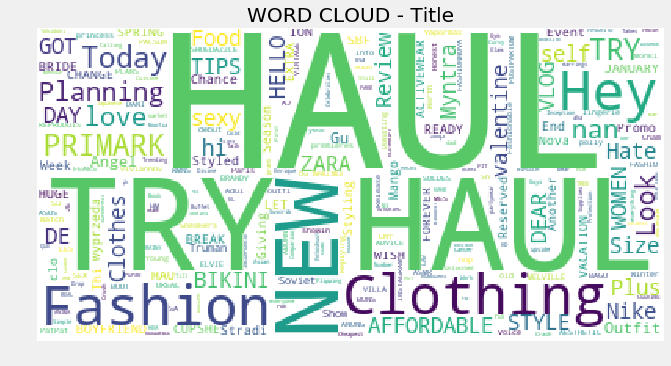

In [206]:
plt.figure(figsize = (10,10))
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WORD CLOUD - Title")
plt.axis('off')
plt.show()

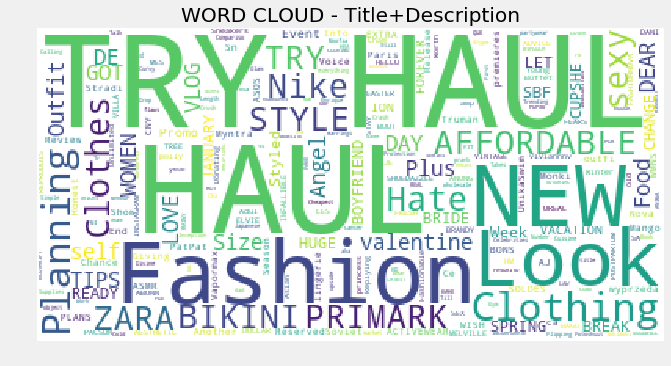

In [205]:
plt.figure(figsize = (10,10))
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['title']))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WORD CLOUD - Title+Description")
plt.axis('off')
plt.show()